In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(y_train.shape)

(60000,)


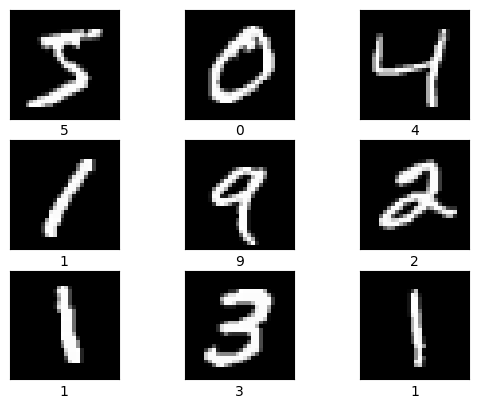

In [7]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(y_train[i])

In [10]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255 # Fixed: Removed extra indentation
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
from keras.models import Sequential
from keras.layers import Dense, Flatten
print(y_train.shape)

(60000, 10, 10)


In [18]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [20]:
 model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
 history = model.fit(x_train, y_train, validation_split=0.2, epochs=10,
batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 0.9923 - val_loss: 0.0234
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9924 - loss: 0.0248 - val_accuracy: 0.9928 - val_loss: 0.0231
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0262 - val_accuracy: 0.9926 - val_loss: 0.0232
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9921 - loss: 0.0265 - val_accuracy: 0.9928 - val_loss: 0.0228
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9929 - loss: 0.0224 - val_accuracy: 0.9927 - val_loss: 0.0227
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.0232 - val_accuracy: 0.9927 - val_loss: 0.0230
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9932 - loss: 0.0224 - val_accuracy: 0.9923 - val_loss: 0.0228
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.0234 -

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy:, {test_accuracy * 100:.2f}%") # Removed extra space before print

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9915 - loss: 0.0264
Test accuracy:, 99.21%


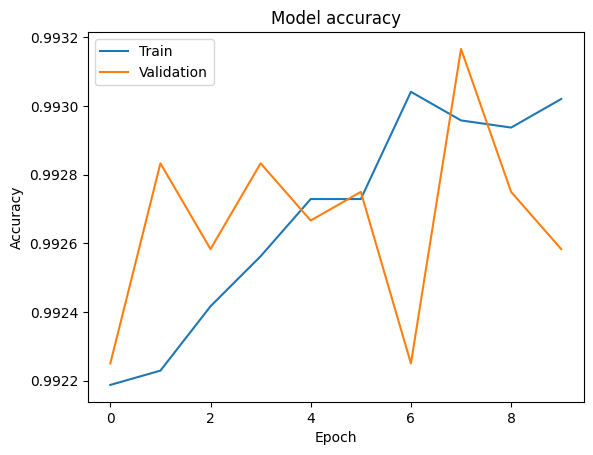

In [25]:
import matplotlib.pyplot as plt # Added import statement

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()